# Computer Vision Thresholding

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
# %matplotlib inline

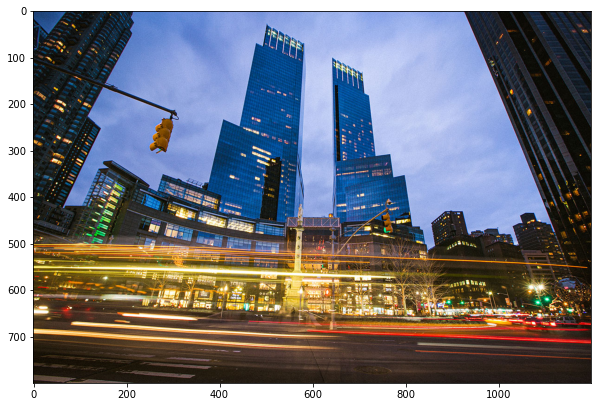

In [2]:
# Load an image and apply all types of thresholding that openCV offers (like thresh_binary, thresh_trunc, tozero, etc)
# Display the original image as well as the thresholded images
img = cv2.imread('img/night_1.jpg')
img2 = cv2.imread('img/beach.jpg')

def imshow(img):
    plt.figure(figsize = (10,7));
    # plt.imshow(img)
    plt.imshow(img[:,:,::-1]);

# hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(img)

In [ ]:
h, w = img.shape[:2]
new_h = h//2
new_w = w//2
img_sm = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_NEAREST)
gray_sm = cv2.resize(gray, (new_w, new_h), interpolation = cv2.INTER_NEAREST)

In [ ]:
img_sm.shape
gray_sm.shape

[Hint](# "cv2.threshold(img, threshold, max_value, cv2.THRESH_BINARY)") 


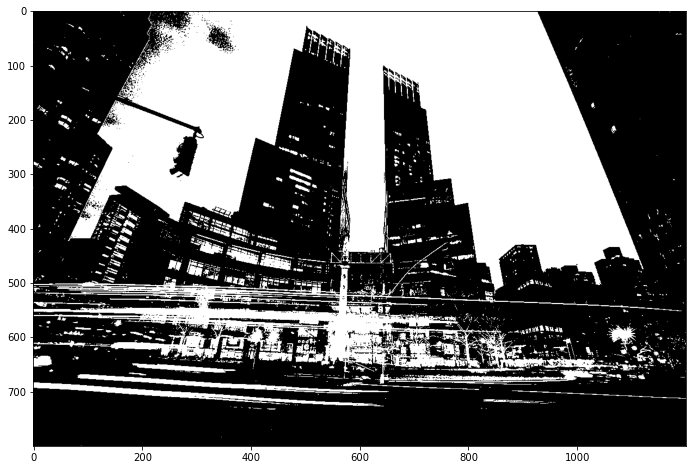

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thres_img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
# thres_img
plt.figure(figsize = (15,8))
plt.imshow(thres_img, cmap='gray')

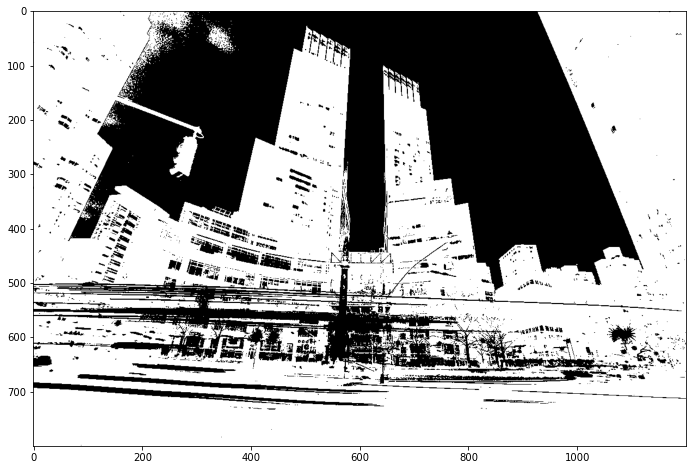

In [4]:
_, thres_img_inv = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
# thres_img
plt.figure(figsize = (15,8))
plt.imshow(thres_img_inv, cmap='gray')

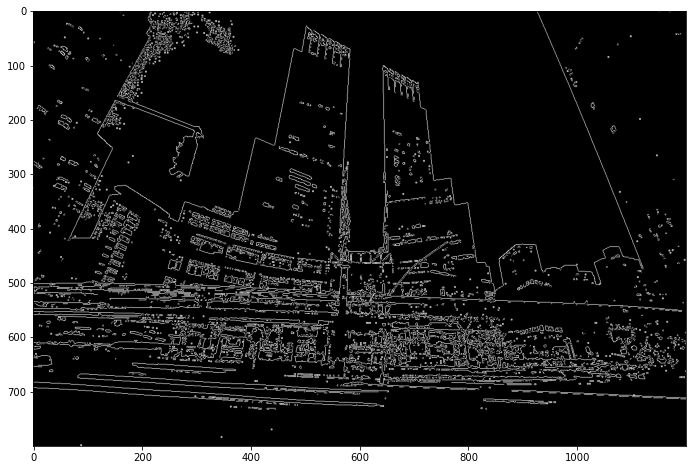

In [5]:
edges = cv2.Canny(thres_img,220,255)
plt.figure(figsize = (15,8))
plt.imshow(edges, cmap='gray')

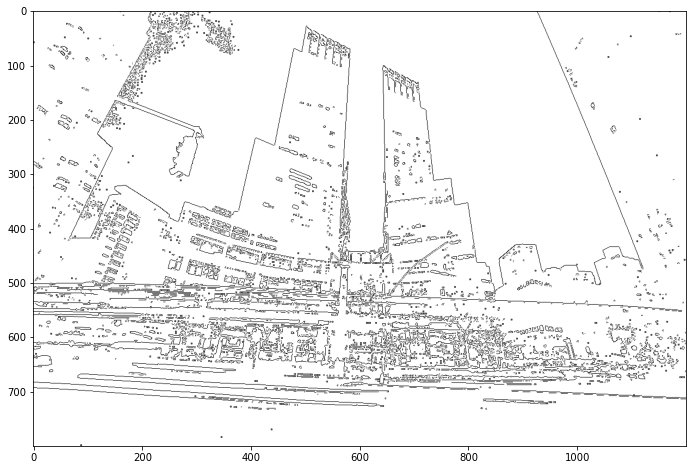

In [6]:
_, canny_inv = cv2.threshold(edges, 128, 255, cv2.THRESH_BINARY_INV)
# thres_img
plt.figure(figsize = (15,8))
plt.imshow(canny_inv, cmap='gray')

In [9]:
opacity = 0.35
img_layer = cv2.addWeighted(canny_inv, opacity, img, 1 - opacity, 0)
img_final = cv2.addWeighted(img_layer, opacity, img, 1 - opacity, 0)
imshow(img_final)

error: OpenCV(4.5.1) ../modules/core/src/arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [ ]:
edges_beach = cv2.Canny(img2,200,255)
plt.figure(figsize = (15,8))
plt.imshow(edges_beach, cmap='gray')

In [ ]:
_, canny_inv = cv2.threshold(edges_beach, 128, 255, cv2.THRESH_BINARY_INV)
# thres_img
plt.figure(figsize = (15,8))
plt.imshow(canny_inv, cmap='gray')

In [ ]:
threshold_value = 128
threshold_type = cv2.THRESH_BINARY

threshold_types = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV, cv2.THRESH_TRUNC]

window_name = 'threshold'

img_copy = img2.copy()
gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)


def change_threshold_value(val):
    threshold_value = val
    ret, thresh = cv2.threshold(gray_img, threshold_value, 255, threshold_type)
    cv2.imshow(window_name, thresh)


def change_threshold_type(val):
    threshold_value = val
    ret, thresh = cv2.threshold(gray_img, threshold_type, 255, threshold_type)
    cv2.imshow(window_name, thresh)


cv2.createTrackbar("Threshold Value", window_name, threshold_value, 255, change_threshold_value)
cv2.createTrackbar('Threshold Type', window_name, threshold_type, 4, change_threshold_type)


cv2.imshow(window_name, gray_img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)


In [ ]:
pixel_values = np.ones(img.shape, dtype='uint8') * 200
bright_img = cv2.add(img, pixel_values)
imshow(bright_img)

In [ ]:
pixel_values = np.ones(img.shape, dtype='uint8') * 50
darker_img = cv2.add(img, pixel_values)
imshow(darker_img)

In [ ]:
# Adjust the values and types to try to isolate the regions of interests the best way possible 
# eliminating as much noise as possible
# Display the original image as well as the thresholded images



In [ ]:
# Repeat the above operations with a different image



In [ ]:
# cv2.threshold will always return 2 values, can you guess what the first value corresponds to?
# print the values to screen and try to see what they correspond to


In [ ]:
# Given this image
text_img = cv2.imread('img/text.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (20,15))
plt.imshow(text_img);

In [ ]:
# Clean it up so it looks like similar to this
text_clean_img = cv2.imread('img/clean-text.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (20,15))
plt.imshow(text_clean_img);

In [ ]:
# Clean up the image text_img and display it here, feel free to use everything you have learn so far


In [ ]:
# Can you also do the same with this one?
dark_notes = cv2.imread('img/notes.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (20,15))
plt.imshow(dark_notes);

In [ ]:
# What is the difference between the first and 2nd image?, did you manage to get good results with the 2nd one?
